In [2]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [4]:
equation_type = str(input())

implicit


In [23]:
N = int(input())

10


In [24]:
K = int(input())

100


In [25]:
T = int(input())

1


In [26]:
params = {
    'l': np.pi,
    'psi':  lambda x: np.sin(np.pi*x),
    'f':    lambda x, t: 0,
    'phi0': lambda t: 0,
    'phi1': lambda t: 0,
    'solution': lambda x, t: (1/(np.pi**2)) * (1 - np.exp((-np.pi**2) * t)) * np.sin(np.pi*x),
    'bound_type': 'a1p1',
}

In [27]:
aprox = int(input())
if (aprox == 1):
    params['bound_type'] = 'a1p1'
elif (aprox == 2):
    params['bound_type'] = 'a1p2'
else:
    params['bound_type'] = 'a1p3'

1


In [28]:
solver = ParabolicSolver(params, equation_type)

In [29]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [30]:
print("Sigma: ",solver.sigma)

Sigma:  0.10132118364233779


In [31]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    ax.plot_surface(x, t, z1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=True)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)
    # # Customize the z axis
    # ax.set_zlim(-1.01, 1.01)

    # # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

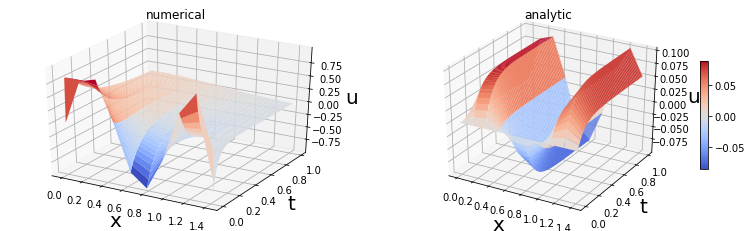

In [32]:
draw(dict_ans, N, K, T)

In [15]:
def draw_u_x(dict_, N, K, T, time=0, save_file="plot_u_x.png"):
    fig = plt.figure()
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    
#     print(z1)

    plt.title('U from x')
    plt.plot(x[0:-2], z1[time][0:-2], color='r', label='numerical')
    plt.plot(x[0:-2], z2[time][0:-2], color='b', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    error = compare_error(dict_ans)
    for i in range(len(error)):
        tmp = 0
        for j in error[i]:
            tmp += j
        err.append(tmp/len(error[i])/1000)
    plt.title('Error from t')
    plt.plot(t, err, color='b', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

In [16]:
curr_time = int(input())

0


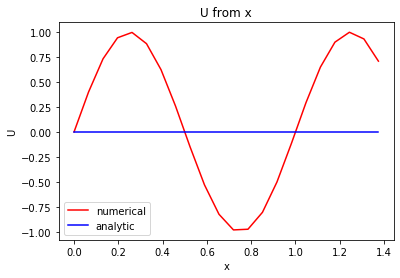

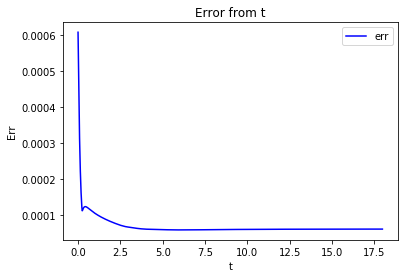

In [17]:
draw_u_x(dict_ans, N, K, T, curr_time)

In [18]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

In [19]:
print(error[0])

[0.0, 0.39974030830479607, 0.7328266655722, 0.9437192093283066, 0.9972530562885595, 0.8845018051369047, 0.6242659526396992, 0.25993803992966535, 0.1477327557127968, 0.5307701289524537, 0.8253052284601049, 0.9822263492274905, 0.9753679720836315, 0.805873684314687, 0.5020054943380189, 0.1144313358989587, 0.2922234618994349, 0.650152004384665, 0.8996721653111478, 0.9991781715213882, 0.9320780798761263, 0.7095603698211661, 0.36872834128103643, 0.0]


In [20]:
print(error[int(K/2)])

[0.015118947966155316, 0.025383213220839647, 0.05920895988853493, 0.08073053483978669, 0.08638420729420943, 0.07526437392097682, 0.04927437288219131, 0.012808864644437954, 0.027979258346066137, 0.06620519376369674, 0.09540064923437327, 0.1105928666051789, 0.1091343283155496, 0.09114479531440538, 0.05949196676788303, 0.019313983213219296, 0.022836610947382402, 0.060084710866829136, 0.08637824700897724, 0.09749651699434553, 0.09175312524896138, 0.07027632434485694, 0.03682001738848274, 0.0028630600597781934]


In [21]:
print(error[-1])

[0.0010565241607875713, 0.03944563702620739, 0.07319972480460173, 0.09457834713457076, 0.10001850168960738, 0.0886156731772847, 0.06227464183822574, 0.025391856909148202, 0.015877662817157013, 0.05464666192743484, 0.08444408071929874, 0.10029409357253104, 0.09954583095139137, 0.08231543440265313, 0.05146673470698685, 0.012133774745254117, 0.029135207126904615, 0.06546959855651961, 0.090821986056411, 0.10097646312474648, 0.0942515454551989, 0.07178048725075455, 0.03732225812496974, 0.0033653007962651956]


In [22]:
print(f'Average error in each N: {avg_err}')
print(f'Average error\t\t: {avg_err / K}')

Average error in each N: 0.06427945426297503
Average error		: 8.034931782871879e-05
